# Import Packages

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae

In [2]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

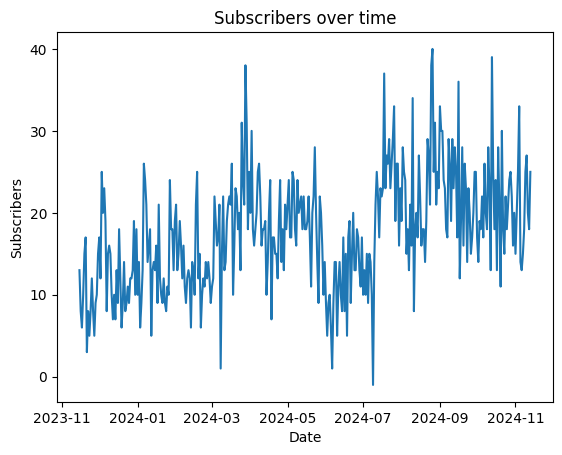

In [3]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [4]:
x_train, x_test, y_train, y_test, scaler = prepare_train_test_data(data, time_step_in=30, time_step_out=30, test_size=0.2)

x_train shape: (244, 30), y_train shape: (244, 30), x_test shape: (61, 30), y_test shape: (61, 30)


In [5]:
model_1=Sequential()
model_1.add(Dense(256,input_shape=(30,),activation="relu"))
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(64,activation="relu"))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(30))
model_1.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,158 (203.74 KB)

 Trainable params: 52,158 (203.74 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=model_1.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1

)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - val_loss: 0.3555 - val_mean_absolute_error: 0.3555
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - val_loss: 0.3129 - val_mean_absolute_error: 0.3129
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - val_loss: 0.2660 - val_mean_absolute_error: 0.2660
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - val_loss: 0.2264 - val_mean_absolute_error: 0.2264
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - val_loss: 0.1952 - val_mean_absolute_error: 0.1952
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - val_loss: 0.1733 - val_mean_absolute_error: 0.1733
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - val_loss: 0.1578 - va

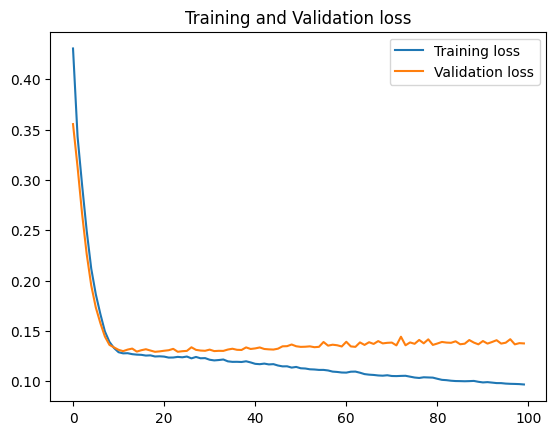

In [7]:
history_plot(history)

In [8]:
train_predicted = model_1.predict(x_train)
test_predicted = model_1.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [9]:
x_test=scaler.inverse_transform(x_test)
x_train=scaler.inverse_transform(x_train)

In [10]:
# calculate MAE
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.09571704564949272 
MAE  Test data : 0.13750689876066113 


## Forcast 30 -> 30

In [11]:
x_test[-1]

array([14., 12., 14., 12.,  9., 11., 12., 22., 19., 16., 17., 21.,  1.,
       15., 22., 13., 14., 19., 21., 22., 21., 26., 10., 16., 23., 22.,
       18., 20., 13., 31.])

In [12]:
y_next_30=model_1.predict(x_test[-1].reshape(1,-1))
y_next_30=np.round(y_next_30)
y_next_30

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[17., 16., 16., 17., 16., 17., 16., 15., 15., 11., 12., 14., 12.,
        13., 11., 13.,  9., 10., 16., 13., 11., 13.,  9., 10., 12., 10.,
        12.,  9., 10., 11.]], dtype=float32)

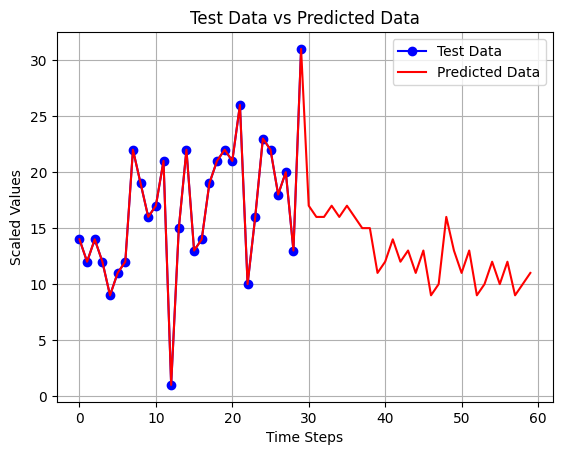

In [13]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
last_date = clean_df.index[-1]
total_sub=np.sum(clean_df["Subscribers"])
total_next_30=np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {total_next_30} => final after 30 days: {total_sub + total_next_30}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 386.0 => final after 30 days: 6769.0


In [15]:
avg_sub = np.mean(np.array(clean_df['Subscribers']))
avg_sub * 30

524.6301369863014

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


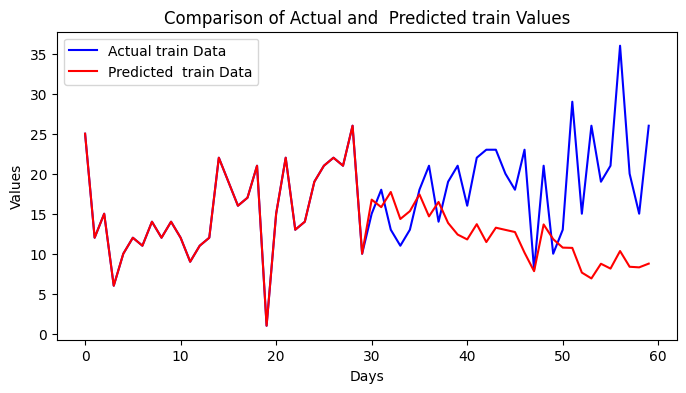

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


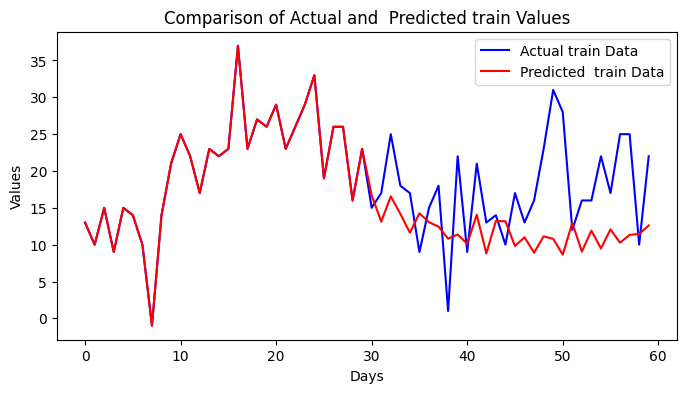

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


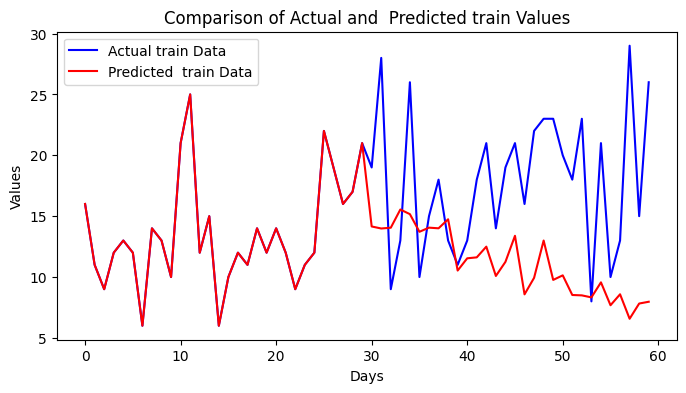

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


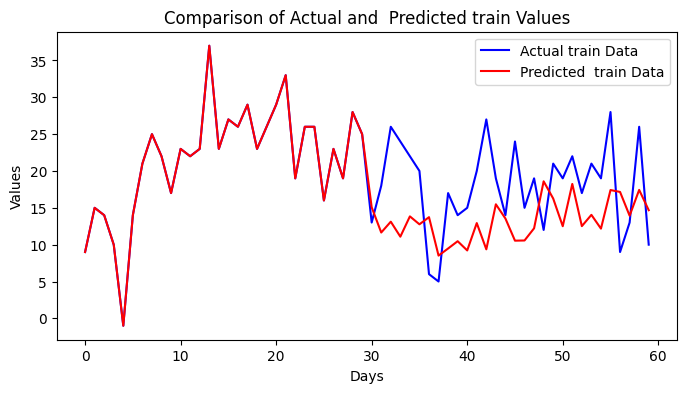

In [16]:
import random
def calculate_random_sequences(n_random, model, X_train):
    for i in range(n_random):
        r = random.randint(0, len(X_train)-30)
        x_temp = X_train[r]
        original_data = list(x_temp)
        for idx in range(1, 31):
            y_next = X_train[r+idx]
            original_data.append(y_next[-1])
        y_temp = model.predict(x_temp.reshape(1, -1))
        x_input = np.array(x_temp)
        y_output = np.array(y_temp).reshape(-1)
        predicted_result = np.concatenate((x_input, y_output))


        plt.figure(figsize=(8, 4))
        plt.plot(original_data, label='Actual train Data', color='blue')
        plt.plot(predicted_result, label='Predicted  train Data', color='red')
        plt.title('Comparison of Actual and  Predicted train Values')
        plt.xlabel('Days')
        plt.ylabel('Values')
        plt.legend()
        plt.show()
calculate_random_sequences(4,model_1,x_train)